# NYPD Shooting Incident Data Report: Effects of Lockdown
### This report will show the effects of lockdown on the shooting incident rates in the NY area through analysis, visualization and modeling. 

In [1]:
import pandas as pd
import numpy as np
import dtale as dta
import datetime as dt
import matplotlib.pyplot as plt



In [2]:
import seaborn as sns


In [3]:
df_ytd=pd.read_csv("https://data.cityofnewyork.us/api/views/5ucz-vwe8/rows.csv?accessType=DOWNLOAD")
df_hist=pd.read_csv("NYPD_Shooting_Incident_Data__Historic_.csv")
df=pd.concat([df_ytd,df_hist])

# Preliminary Analysis

### 1. Explore the Data

In [4]:
#Explore data by first seeing overview of the data columns, length, etc.
df.info()
#We have locations , dates, and perpetrator data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27312 entries, 0 to 25595
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   INCIDENT_KEY              27312 non-null  int64  
 1   OCCUR_DATE                27312 non-null  object 
 2   OCCUR_TIME                27312 non-null  object 
 3   BORO                      27312 non-null  object 
 4   LOC_OF_OCCUR_DESC         1716 non-null   object 
 5   PRECINCT                  27312 non-null  int64  
 6   JURISDICTION_CODE         27310 non-null  float64
 7   LOC_CLASSFCTN_DESC        1716 non-null   object 
 8   LOCATION_DESC             12335 non-null  object 
 9   STATISTICAL_MURDER_FLAG   27312 non-null  object 
 10  PERP_AGE_GROUP            17968 non-null  object 
 11  PERP_SEX                  18002 non-null  object 
 12  PERP_RACE                 18002 non-null  object 
 13  VIC_AGE_GROUP             27312 non-null  object 
 14  VIC_SE

### 2. See amount of bad data (nulls) and repetition

In [5]:
df.isna().sum()


INCIDENT_KEY                    0
OCCUR_DATE                      0
OCCUR_TIME                      0
BORO                            0
LOC_OF_OCCUR_DESC           25596
PRECINCT                        0
JURISDICTION_CODE               2
LOC_CLASSFCTN_DESC          25596
LOCATION_DESC               14977
STATISTICAL_MURDER_FLAG         0
PERP_AGE_GROUP               9344
PERP_SEX                     9310
PERP_RACE                    9310
VIC_AGE_GROUP                   0
VIC_SEX                         0
VIC_RACE                        0
X_COORD_CD                      0
Y_COORD_CD                      0
Latitude                       10
Longitude                      10
New Georeferenced Column    25606
Lon_Lat                      1716
dtype: int64

#### Most of the missing data is in location descriptions, and the column could be removed or ignored instead of removing from data samples that are missing it.
#### Missing perp data might indicate not being able to catch the perpetrator, which apparently is more than third of the entries. This could lead to bias so we will have to see.

In [6]:
df['INCIDENT_KEY'].nunique()

21420

#### We have overlapping incidents ids that need to be cleaned.

In [7]:
df_grouped = df.groupby('INCIDENT_KEY')

In [8]:
#get a dict of the columns when aggragating the same incident keys
columns_dict = {col: 'max' for col in df.columns}
# {'column name': 'max', ..... 'column name': 'max'} 

In [9]:
df=df_grouped.agg(columns_dict)

### 3. Turn Date strings into a useable Datetime object

In [10]:
df["OCCUR_DATE"]=pd.to_datetime(df["OCCUR_DATE"])

In [11]:
df.sort_values(by="OCCUR_DATE", ascending=True,inplace=True)

In [12]:
df

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Lon_Lat
INCIDENT_KEY,,,,,,,,,,,,,,,,,,,,,
9953245,9953245,2006-01-01,02:00:00,BRONX,NaN,48,0.0,NaN,NONE,False,...,BLACK,<18,M,BLACK,1.013405e+06,251800.750000,40.857770,-73.894607,NaN,POINT (-73.89460745999997 40.85776982200008)
9953252,9953252,2006-01-01,02:22:00,MANHATTAN,NaN,28,0.0,NaN,NONE,True,...,BLACK,25-44,M,BLACK,9.988158e+05,233545.437500,40.807700,-73.947386,NaN,POINT (-73.94738575999997 40.80770036400003)
9953250,9953250,2006-01-01,02:34:00,QUEENS,NaN,114,0.0,NaN,BAR/NIGHT CLUB,True,...,BLACK,25-44,M,BLACK,1.002577e+06,221583.453125,40.774861,-73.933833,NaN,POINT (-73.93383258499995 40.77486094100004)
139716503,139716503,2006-01-01,12:30:00,BROOKLYN,NaN,77,0.0,NaN,PVT HOUSE,True,...,NaN,25-44,M,BLACK,9.964416e+05,184160.359375,40.672154,-73.956052,NaN,POINT (-73.95605150499995 40.67215420900004)
9953247,9953247,2006-01-01,03:30:00,BROOKLYN,NaN,67,0.0,NaN,NaN,False,...,UNKNOWN,18-24,M,BLACK,9.993160e+05,176460.000000,40.651014,-73.945707,NaN,POINT (-73.94570651699996 40.65101399800005)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261176929,261176929,2022-12-30,17:00:00,MANHATTAN,OUTSIDE,30,0.0,STREET,(null),N,...,BLACK,25-44,M,BLACK,9.982210e+05,239909.000000,40.825160,-73.949519,POINT (-73.949519 40.82516),NaN
261176930,261176930,2022-12-30,21:54:00,BRONX,OUTSIDE,43,0.0,STREET,GROCERY/BODEGA,N,...,(null),18-24,M,BLACK,1.018018e+06,243141.000000,40.833978,-73.877971,POINT (-73.877971 40.833978),NaN
261160236,261160236,2022-12-30,20:55:00,BROOKLYN,INSIDE,70,0.0,DWELLING,MULTI DWELL - APT BUILD,Y,...,(null),<18,M,BLACK,9.959130e+05,177183.000000,40.652997,-73.957965,POINT (-73.957965 40.652997),NaN


### 4. See approaches of analysis
#### The prescence of Datetime objects would let us analyze any time based criteria: frequency, seasonality, time of day. The prescence of geolocations would let us analyze any location based criteria. Since we are still; recovering from a global pandemic, let us explore its effects on crimes, starting from 2020-2022, compared to 2017-2019. 


### 5. Data Preparation: separate data by years


In [13]:
#function creates new dataframe column based on years 
def create_year_dataframe(df,year):
    start_date = pd.Timestamp(year, 1, 1)
    end_date = pd.Timestamp(year+1, 1, 1)
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    df['year'] = df['OCCUR_DATE'].dt.year

    return df

In [14]:
df=create_year_dataframe(df,2021)

In [15]:
#Per year
df_2022=df[df['year']==2022]
df_2021=df[df['year']==2021]
df_2020=df[df['year']==2020]

#pre and post covid
df_overall=df[df['year']>=2017]
df_pstcvd=df[df['year']>=2020]
df_precvd=df[(df['year']< 2020) & (df['year']>= 2017)] 

# Analysis and visualizations

### 1. Overall chart comparisons

In [16]:
counts = df_overall.groupby('OCCUR_DATE').size()
counts = counts.resample('M').sum()
counts= counts.sort_index()


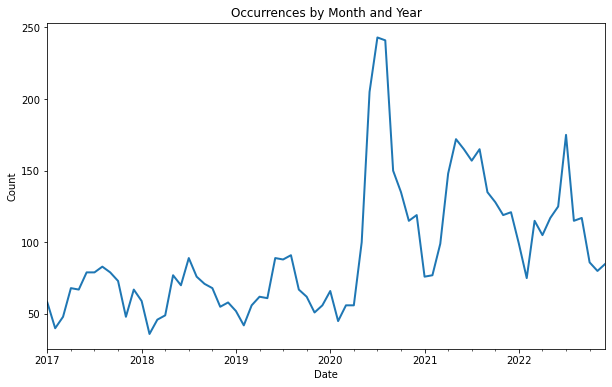

In [17]:
# Create a line plot of the counts over time
ax = counts.plot(figsize=(10, 6), linewidth=2)
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_title('Occurrences by Month and Year')
#ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))

plt.show()


#### This is a basic graph, but it shows just how profound the effect of the COVID lockdown was overall to the shootings count. To put this into perspective, the minimal seasonal incident rates of post lockdown is almost equal to the maximal rates pre-lockdown. During lockdown the rates skyrocketed three times the previous year's peak.

### 2. Overall Incidents Histogram

In [18]:
counts = df_overall.groupby('OCCUR_DATE').size()
counts = counts.resample('Y').sum()
counts= counts.sort_index()
counts= counts.reset_index()

In [19]:
counts['Year']=counts['OCCUR_DATE'].dt.year

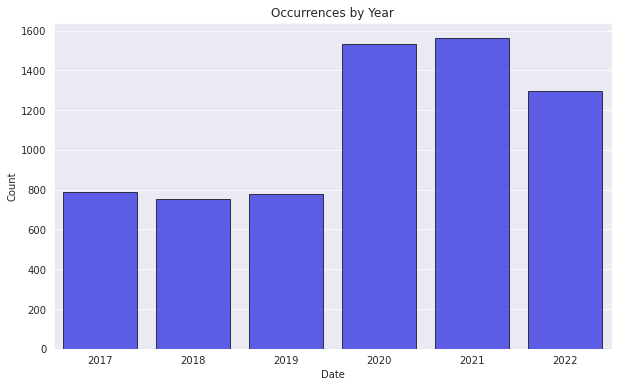

In [20]:

# Set the plot style
sns.set_style('darkgrid')

# Create a histogram of the counts using Seaborn
fig, ax = plt.subplots(figsize=(10, 6))
#sns.histplot(data=counts, ,y=0, ax=ax, binwidth=100, color='blue', edgecolor='white', linewidth=1.5, alpha=0.7, bar_kws={'ec':'black'})
sns.barplot(data=counts,x='Year', y=0, color='blue', edgecolor='black', alpha=0.7)

# Set the x-axis label to month, year
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_title('Occurrences by Year')
#ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

plt.show()

#### This is a histogram of the overall shootings annually, we can see that the lockdown ease did NOT immediately reduce shooting incidents. Instead, we are still just beginning of recovery from the trauma. Lockdowns greatly increased the likelihood of shootings, not decrease them.

In [21]:

counts = df_overall.groupby('OCCUR_DATE').size()
counts = counts.resample('M').sum()
counts= counts.sort_index()


### 3. Models before and after lockdown 

In [22]:
from statsmodels.tsa.arima.model import ARIMA

In [31]:
df_precvd_month=df_precvd.groupby('OCCUR_DATE').size()
df_precvd_month= df_precvd_month.resample('M').sum()

/home/jeffwa/anaconda3/envs/DL_new/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/jeffwa/anaconda3/envs/DL_new/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



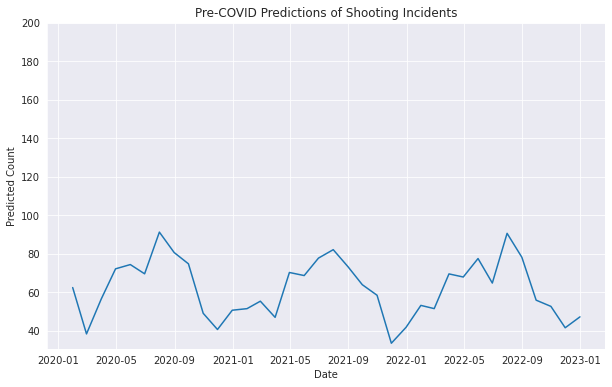

In [35]:
model = ARIMA(df_precvd_month, order=(24, 1,3))
model_fit = model.fit()
# Forecast future values of the time series
forecast = model_fit.forecast(steps=36)

# Plot the forecasted values
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(forecast)
ax.set_ylim(top=200)
ax.set_xlabel('Date')
ax.set_ylabel('Predicted Count')
ax.set_title('Pre-COVID Predictions of Shooting Incidents')
plt.show()


#### The model would predict normal behavior had it not been for lockdowns.

/home/jeffwa/anaconda3/envs/DL_new/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/jeffwa/anaconda3/envs/DL_new/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



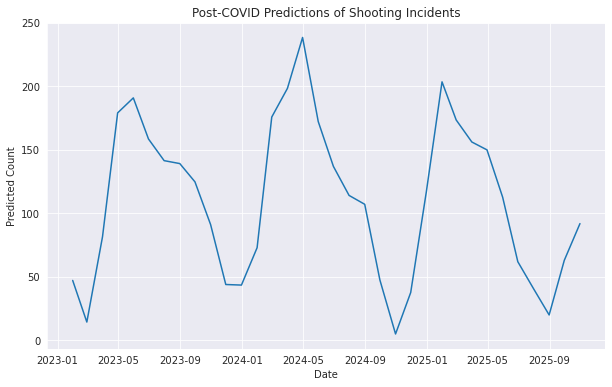

In [41]:
df_pstcvd_month=df_pstcvd.groupby('OCCUR_DATE').size()
df_pstcvd_month= df_pstcvd_month.resample('M').sum()
model = ARIMA(df_pstcvd_month, order=(24, 1,1))
model_fit = model.fit()
# Forecast future values of the time series
forecast = model_fit.forecast(steps=34)

# Plot the forecasted values
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(forecast)
ax.set_xlabel('Date')
ax.set_ylabel('Predicted Count')
ax.set_title('Post-COVID Predictions of Shooting Incidents')
plt.show()

#### The ARIMA model forecasts that incidents for the next three years will maintain its highs after lockdown.

### 5. Bias
#### The numbers reported may have biases because the likelihood of reporting a crime near in home is much higher than at work or outside. Although the data strongly suggests lockdowns were a major playing factor, we must acknowledge that not all  shooting incidents that are reported are representative of general shooting incidents in NYC. For example, incidents that result in serious injury or death may be more likely to be reported or investigated, while less severe incidents may go unreported or unnoticed.

### 6. Conclusions 

<p style='text-align: left;'>
    
<b>   As the COVID-19 nationwide lockdowns came into place, the daily routines of the majority of people in the United States was abruptly and almost permanently affected. In compliance with the Centers for Disease Control and Prevention's (CDC) guidelines on social distancing, businesses, schools, and whole industries have had to replace physical activities with virtual/remote options. This initiative has proven successful in decreasing the spread of COVID-19 and was imperative for effectively addressing the pandemic. However, as a result of the stresses of isolation, inactivity, financials, and claustrophobia, gun violence have skyrocketed. The NYPD recent official data supports this. The visualizations illustrate that there is a paradoxical trend of increased gun related violence in the midst and recovery of the pandemic.<b>
    

</p>

<p style='text-align: left;'>
<b>    
A possible factor to the increase in firearm-related incidents may be associated with the length of unemployment. This could be attributed to the financial strain that individuals, particularly those of lower socioeconomic status. As a result of desperation, many resort to theft as a means of income and food.
    

<p style='text-align: left;'>
    
<b>   
Alternatively, the surge in gun violence during this period could also be attributed to the spike in alcohol sales and consumption. Studies have demonstrated that alcohol consumption tends to lead to higher propensities for violent behavior and risk-taking, which can escalate into altercations and even violent crimes.
        
    
</p>

<p style='text-align: left;'>
    
<b>   
Other factors may also include the general mental stresses of COVID as suicides and anxiety have greatly increased, which further leads into increased rates of gun violence.
    
</p>

<p style='text-align: left;'>
    
<b> 
    
Unfortunately, it is unlikely that this growth in gun violence will return to normal levels any time soon. As the forecast suggests, the decay rate of these incidents have been slow. We are hoping for pre-lockdown levels in about a decade, hopefully less. But I nonetheless urge the for more awareness and action regarding these increased dangers to public health and safety.
 
    
</p>